In [31]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, TargetEncoder


In [32]:
train_url = r'D:\Visual Studio\Lomba\Lomba Adikara\train_adikara2024.csv'
test_url = r'D:\Visual Studio\Lomba\Lomba Adikara\test_adikara2024_unlabeled.csv'

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

train.head()

,id,Country,Year,Month,FoodPriceIndex
0,3501,Mexico,1971,11,0.0
1,60601,South Africa,2002,7,43.9
2,64399,Japan,2004,8,89.8
3,24227,France,1983,1,48.9
4,63779,Japan,2004,4,90.2


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11616 non-null  int64  
 1   Country         11616 non-null  object 
 2   Year            11616 non-null  int64  
 3   Month           11616 non-null  int64  
 4   FoodPriceIndex  11268 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 453.9+ KB


In [34]:
print("Train Data missing values:")
print(train.isna().sum())

print("Train Data duplicated: ", train.duplicated().sum())
print('-'*50)

print("Train Data Length: ", len(train))

Train Data missing values:
id                  0
Country             0
Year                0
Month               0
FoodPriceIndex    348
dtype: int64
Train Data duplicated:  0
--------------------------------------------------
Train Data Length:  11616


In [35]:
proportion_missing = train.isna().sum() / len(train)
print(proportion_missing)

id                0.000000
Country           0.000000
Year              0.000000
Month             0.000000
FoodPriceIndex    0.029959
dtype: float64


Missing values per Country:
Country
Luxembourg        24
Switzerland       20
Denmark           19
United States     19
Netherlands       19
South Africa      19
Canada            17
Austria           17
Taiwan, China     17
United Kingdom    16
Italy             15
France            15
Portugal          15
Israel            15
Spain             15
Turkey            14
Sweden            13
Mexico            13
Greece            13
Germany           12
Japan             12
Finland            9
Name: count, dtype: int64

Missing values per Year:
Year
2003    13
1980    12
2006    12
2001    11
1996    11
1973    11
1976    11
2013    10
2002    10
1978    10
1999    10
2007    10
2010     9
1989     9
2004     9
1988     9
1977     9
1994     9
1971     8
1975     8
1995     8
1972     8
1974     7
2005     7
1983     7
1997     7
1970     7
2000     7
1979     7
1981     7
2009     7
1985     6
1992     6
2011     6
1990     6
1984     6
1987     6
2008     5
1993     5
1982     5
1991 

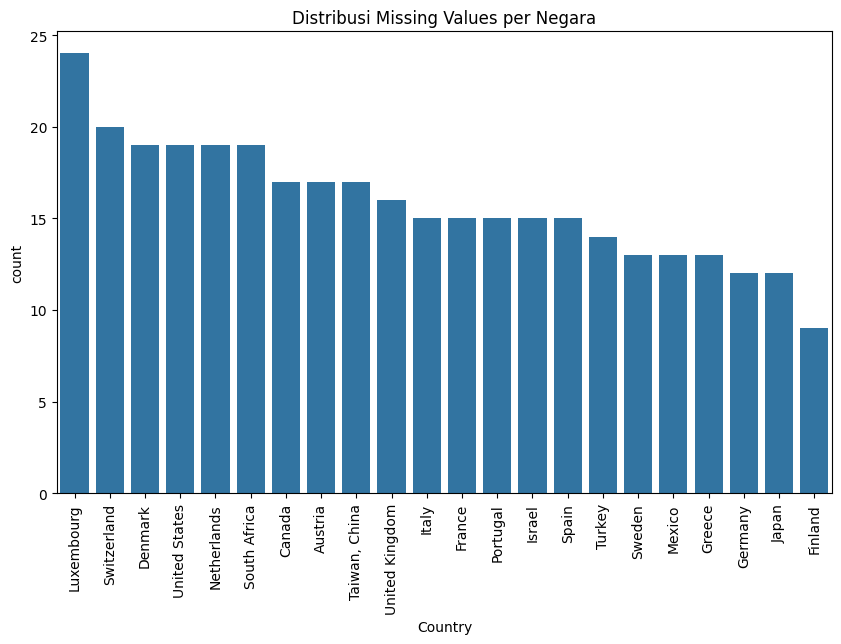

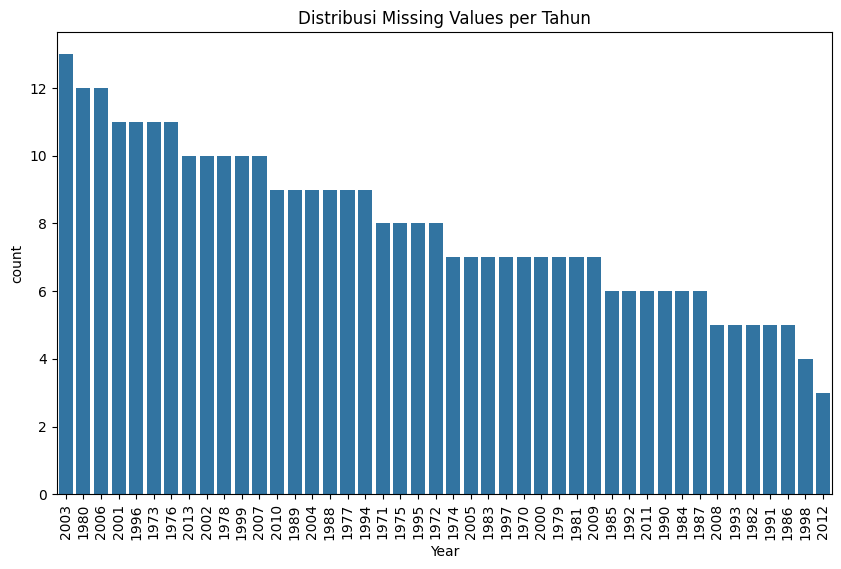

In [36]:
# Misalkan data Anda ada dalam DataFrame bernama df
# Menampilkan missing values per negara
missing_values = train[train['FoodPriceIndex'].isna()]['Country'].value_counts()
print("Missing values per Country:")
print(missing_values)

# Menampilkan missing values per tahun (Year)
missing_by_year = train[train['FoodPriceIndex'].isna()]['Year'].value_counts()
print("\nMissing values per Year:")
print(missing_by_year)

# Visualisasi missing values per negara
plt.figure(figsize=(10, 6))
sns.countplot(data=train[train['FoodPriceIndex'].isna()], x='Country', order=missing_values.index)
plt.title('Distribusi Missing Values per Negara')
plt.xticks(rotation=90)
plt.show()

# Visualisasi missing values per tahun
plt.figure(figsize=(10, 6))
sns.countplot(data=train[train['FoodPriceIndex'].isna()], x='Year', order=missing_by_year.index)
plt.title('Distribusi Missing Values per Tahun')
plt.xticks(rotation=90)
plt.show()


In [37]:
# Menghapus baris dengan missing value
train.dropna(subset=['FoodPriceIndex'], inplace=True)

print(train.isna().sum())

id                0
Country           0
Year              0
Month             0
FoodPriceIndex    0
dtype: int64


In [38]:
print("Test Data missing values:")
print(test.isna().sum())

print("Test Data duplicated: ", test.duplicated().sum())

print('-'*50)

print("Test Data Length: ", len(test))

Test Data missing values:
id         0
Country    0
Year       0
Month      0
dtype: int64
Test Data duplicated:  0
--------------------------------------------------
Test Data Length:  2640


In [39]:
num_cols = train.select_dtypes(include=[np.number]).columns
cat_cols = train.select_dtypes(exclude=[np.number]).columns

num_cols_test = test.select_dtypes(include=[np.number]).columns
cat_cols_test = test.select_dtypes(exclude=[np.number]).columns

print('Numerical Columns: ', num_cols)
print('Categorical Columns: ', cat_cols)

Numerical Columns:  Index(['id', 'Year', 'Month', 'FoodPriceIndex'], dtype='object')
Categorical Columns:  Index(['Country'], dtype='object')


In [40]:
train['Month'].value_counts()

Month
8     945
7     944
6     943
9     942
12    940
4     939
2     939
10    939
1     937
11    936
3     934
5     930
Name: count, dtype: int64

In [41]:
train['Country'].value_counts()

Country
Finland           519
Germany           516
Japan             516
Mexico            515
Greece            515
Sweden            515
Turkey            514
Portugal          513
France            513
Spain             513
Italy             513
Israel            513
United Kingdom    512
Austria           511
Canada            511
Taiwan, China     511
Denmark           509
South Africa      509
Netherlands       509
United States     509
Switzerland       508
Luxembourg        504
Name: count, dtype: int64

In [42]:
test['Country'].value_counts()

Country
Italy             120
Denmark           120
Luxembourg        120
South Africa      120
Austria           120
Sweden            120
Germany           120
Spain             120
Mexico            120
France            120
Greece            120
Switzerland       120
Israel            120
United Kingdom    120
Turkey            120
Taiwan, China     120
Finland           120
Portugal          120
Canada            120
Netherlands       120
United States     120
Japan             120
Name: count, dtype: int64

In [43]:
train['FoodPriceIndex'].value_counts()

FoodPriceIndex
0.0000     475
0.1000      81
0.2000      29
91.7000     28
91.8000     27
          ... 
73.8145      1
64.1200      1
71.5500      1
59.8600      1
81.3921      1
Name: count, Length: 1795, dtype: int64

In [44]:
train['Year'].value_counts()

Year
2012    261
1998    260
1991    259
1982    259
2008    259
1993    259
1986    259
1992    258
2011    258
1990    258
1984    258
1985    258
1987    258
2009    257
1981    257
1970    257
2000    257
1997    257
1983    257
1974    257
1979    257
2005    257
1972    256
1971    256
1975    256
1995    256
2010    255
2004    255
1977    255
1988    255
1994    255
1989    255
2002    254
2013    254
2007    254
1978    254
1999    254
2001    253
1996    253
1973    253
1976    253
1980    252
2006    252
2003    251
Name: count, dtype: int64

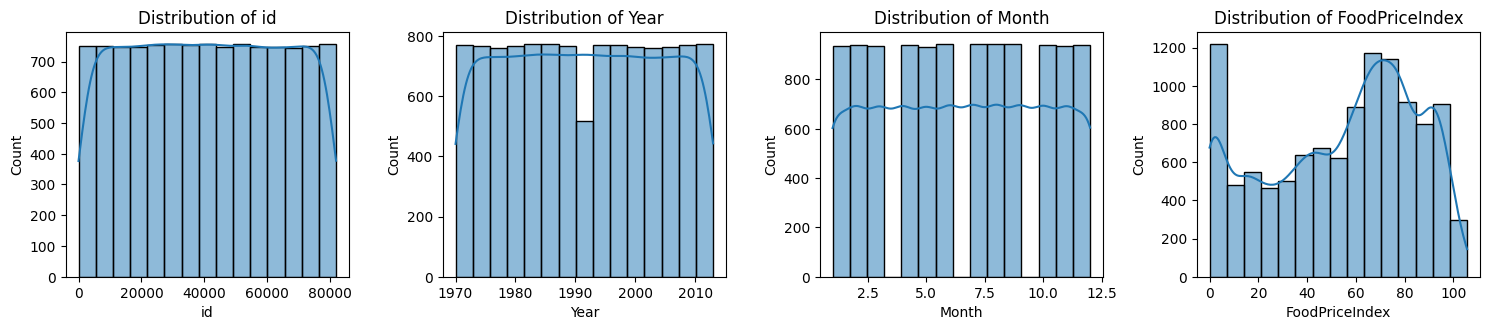

In [45]:
# Set figure size
plt.figure(figsize=(15, 6))

# Plot histogram untuk setiap kolom numerik dalam train[num_cols]
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i + 1)  # Membagi plot menjadi 2 baris dan 4 kolom
    sns.histplot(train[col], bins=15, kde=True)  # 'kde=True' menambahkan kurva KDE (jika diinginkan)
    plt.title(f"Distribution of {col}")  # Judul untuk tiap subplot

# Tampilkan plot
plt.tight_layout()  # Untuk mengatur layout agar tidak tumpang tindih
plt.show()


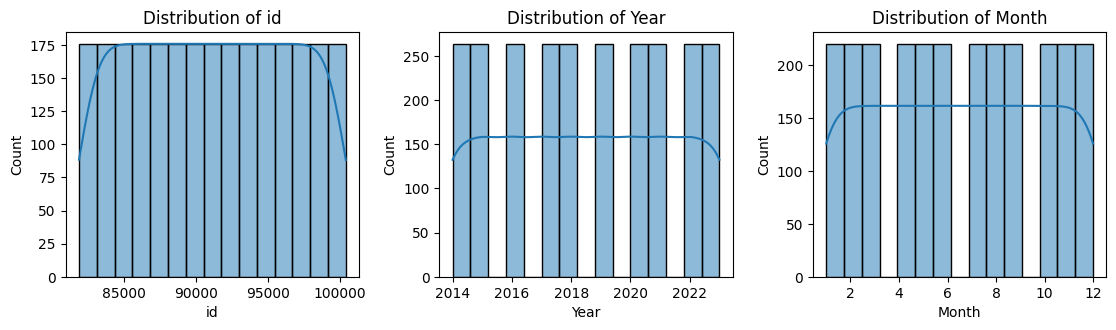

In [46]:
# Set figure size
plt.figure(figsize=(15, 6))

# Plot histogram untuk setiap kolom numerik dalam train[num_cols]
for i, col in enumerate(num_cols_test):
    plt.subplot(2, 4, i + 1)  # Membagi plot menjadi 2 baris dan 4 kolom
    sns.histplot(test[col], bins=15, kde=True)  # 'kde=True' menambahkan kurva KDE (jika diinginkan)
    plt.title(f"Distribution of {col}")  # Judul untuk tiap subplot

# Tampilkan plot
plt.tight_layout()  # Untuk mengatur layout agar tidak tumpang tindih
plt.show()


In [47]:
country_avg = train.groupby('Country')['FoodPriceIndex'].mean()
train['Country_AvgPrice'] = train['Country'].map(country_avg)


# Cyclical encoding untuk bulan
train['Month_sin'] = np.sin(2 * np.pi * train['Month'] / 12)
train['Month_cos'] = np.cos(2 * np.pi * train['Month'] / 12)

# Waktu berlalu dari awal dataset
train['Elapsed_Months'] = (train['Year'] - train['Year'].min()) * 12 + train['Month']

# Kombinasi Year dan Month menjadi YYYYMM
train['YearMonth'] = train['Year'] * 100 + train['Month']

# Menambahkan kolom kuartal
train['Quarter'] = ((train['Month'] - 1) // 3) + 1

# Menambahkan kolom semester
train['Semester'] = ((train['Month'] - 1) // 6) + 1


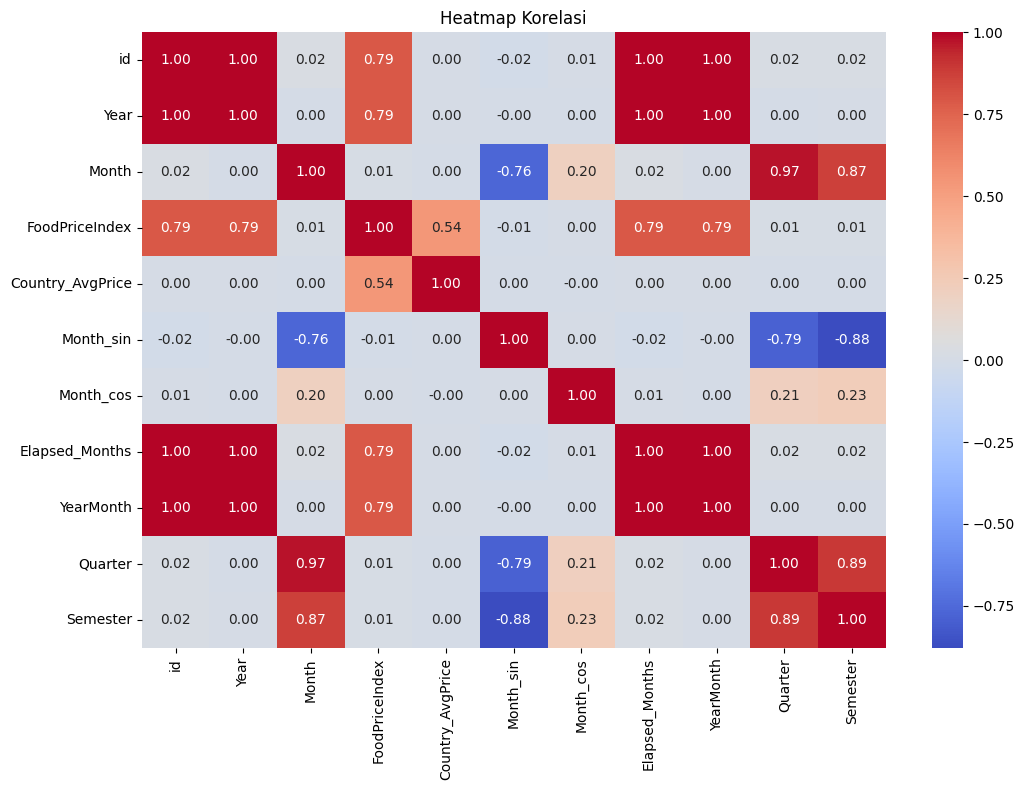

In [48]:
# Hitung matriks korelasi
corr = train.corr(numeric_only=True)  # Pastikan hanya kolom numerik yang digunakan

# Buat heatmap
plt.figure(figsize=(12, 8))  # Atur ukuran figur
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi")
plt.show()

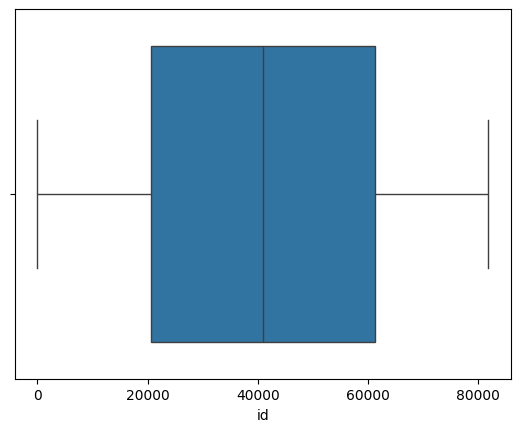

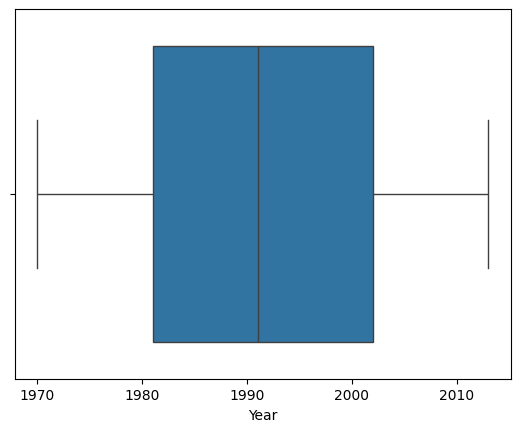

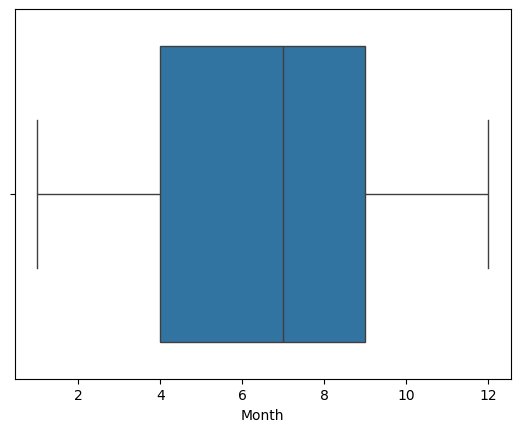

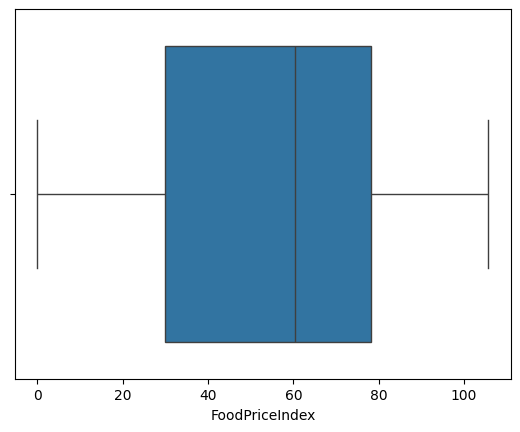

In [49]:
for col in num_cols:
    sns.boxplot(x=train[col])
    plt.show()

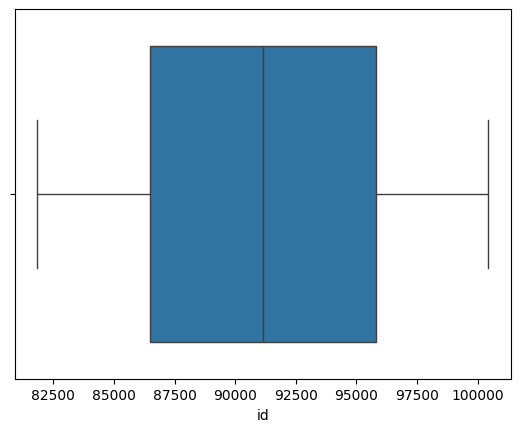

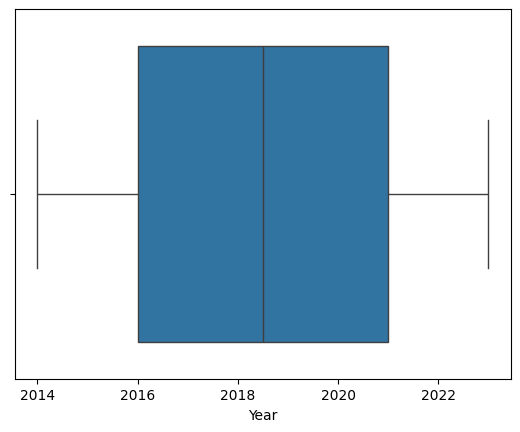

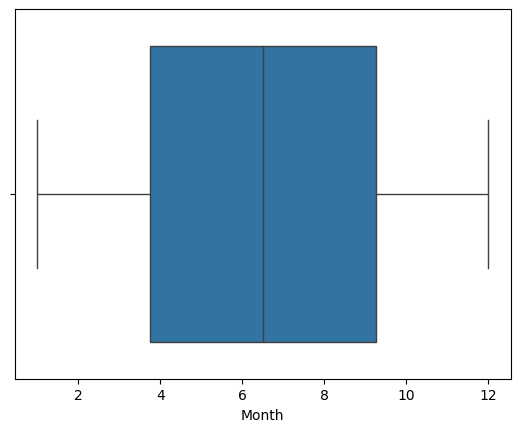

In [50]:
for col in num_cols_test:
    sns.boxplot(x=test[col])
    plt.show()

In [51]:
X = train.drop(columns=['FoodPriceIndex', 'id'])
y = train['FoodPriceIndex']

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((9014, 10), (2254, 10), (9014,), (2254,))

In [53]:
# set Country to TargetEncoder using category_encoders library
import category_encoders as ce


te = ce.TargetEncoder(cols=['Country'])
X_train = te.fit_transform(X_train, y_train)
X_val = te.transform(X_val)

In [54]:
X_train

,Country,Year,Month,Country_AvgPrice,Month_sin,Month_cos,Elapsed_Months,YearMonth,Quarter,Semester
10426,52.708049,1999,5,53.095517,5.000000e-01,-0.866025,353,199905,2,1
6551,59.943839,1992,11,59.473870,-5.000000e-01,0.866025,275,199211,4,2
8899,71.744059,1990,2,71.803340,8.660254e-01,0.500000,242,199002,1,1
11548,25.432524,2010,6,25.490485,1.224647e-16,-1.000000,486,201006,2,1
9181,71.744059,2001,6,71.803340,1.224647e-16,-1.000000,378,200106,2,1
...,...,...,...,...,...,...,...,...,...,...
5923,38.852580,1975,6,38.772515,1.224647e-16,-1.000000,66,197506,2,1
5366,50.129975,2004,2,50.526282,8.660254e-01,0.500000,410,200402,1,1
5569,68.940091,2012,4,68.830241,8.660254e-01,-0.500000,508,201204,2,1
884,15.753071,1995,10,15.111868,-8.660254e-01,0.500000,310,199510,4,2


In [55]:
# Calculate sMAPE
def smape(A, F):
    denominator = np.abs(A) + np.abs(F)
    numerator = 2 * np.abs(F - A)
    print(f"Denominator: {denominator}")
    print(f"Numerator: {numerator}")
    return 100/len(A) * np.sum(numerator / denominator)

C:\Users\Rudi Firdaus\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rudi Firdaus\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rudi Firdaus\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rudi Firdaus\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Rudi Firdaus\AppData\Roaming\Python

Denominator: [108.96008877 104.14763728 116.92467155 ... 190.52595634 196.42595634
 195.72595634]
Numerator: [165.92017753 177.09527457 151.4493431  ...   4.25191268   7.54808732
   6.14808732]
sMAPE: 69.02%


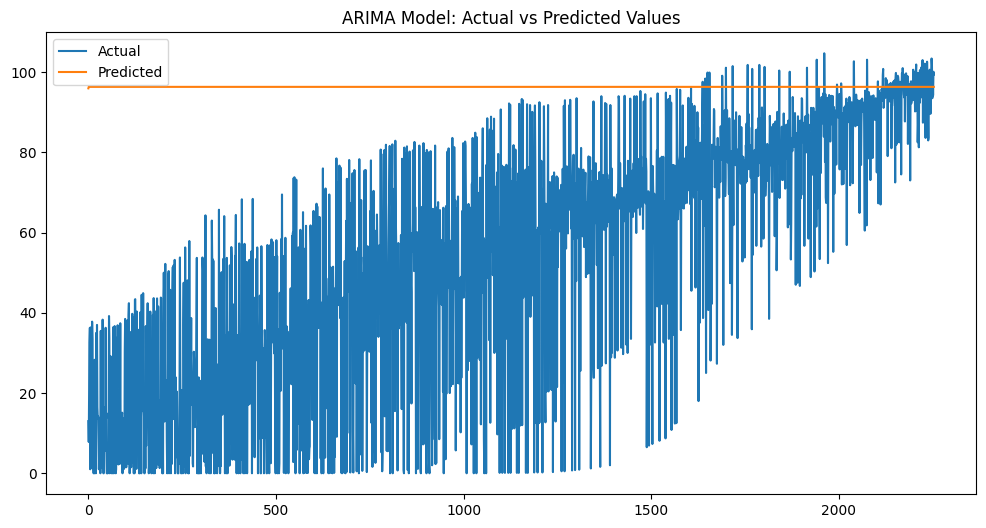

In [56]:
from statsmodels.tsa.arima.model import ARIMA

# Sort data by Year and Month to ensure time series order
X_train_sorted = pd.concat([y_train, X_train], axis=1).sort_values(['Year', 'Month'])
X_val_sorted = pd.concat([y_val, X_val], axis=1).sort_values(['Year', 'Month'])

# Fit ARIMA model
model = ARIMA(X_train_sorted['FoodPriceIndex'], order=(1,1,1))
results = model.fit()

# Make predictions
predictions = results.forecast(steps=len(y_val))

smape_arima = smape(X_val_sorted['FoodPriceIndex'].values, predictions.values)
print(f'sMAPE: {smape_arima:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(predictions.values, label='Predicted')
plt.title('ARIMA Model: Actual vs Predicted Values')
plt.legend()
plt.show()

C:\Users\Rudi Firdaus\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rudi Firdaus\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rudi Firdaus\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Rudi Firdaus\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get

Denominator: [109.28800254 104.96005876 117.83260515 ... 213.01821058 218.10031707
 216.64540339]
Numerator: [166.57600508 178.72011753 153.26521029 ...  49.23642116  35.80063413
  35.69080678]
sMAPE: 78.26%


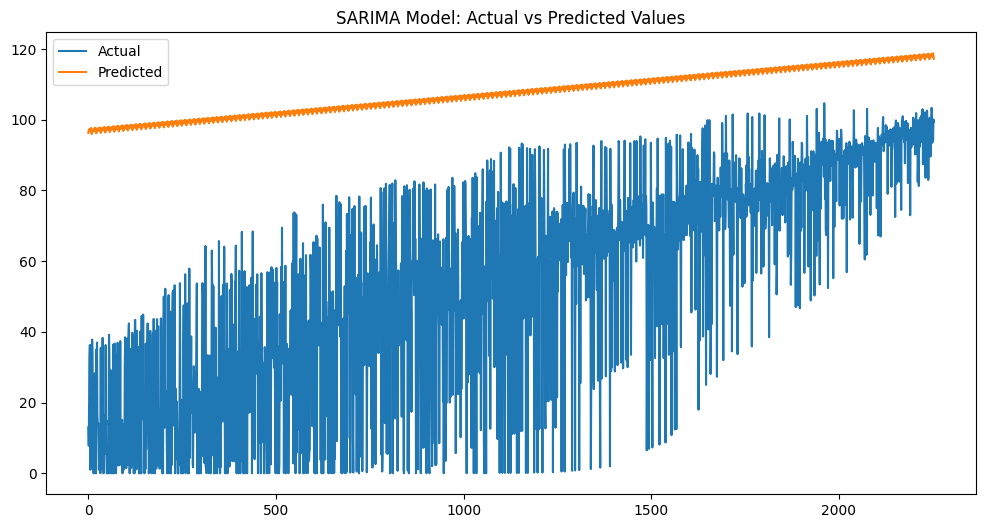

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Sort data by Year and Month to ensure time series order
X_train_sorted = pd.concat([y_train, X_train], axis=1).sort_values(['Year', 'Month'])
X_val_sorted = pd.concat([y_val, X_val], axis=1).sort_values(['Year', 'Month'])

# Fit SARIMA model
# Using order=(1,1,1) for ARIMA part and seasonal_order=(1,1,1,12) for seasonal part
model = SARIMAX(X_train_sorted['FoodPriceIndex'], 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12))
results = model.fit()

# Make predictions
predictions = results.forecast(steps=len(y_val))

smape_sarima = smape(X_val_sorted['FoodPriceIndex'].values, predictions.values)
print(f'sMAPE: {smape_sarima:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(predictions.values, label='Predicted')
plt.title('SARIMA Model: Actual vs Predicted Values')
plt.legend()
plt.show()

19:27:17 - cmdstanpy - INFO - Chain [1] start processing
19:27:19 - cmdstanpy - INFO - Chain [1] done processing


Denominator: [ 33.24278135  19.11741348  37.88647189 ... 216.59773558 204.86854354
 193.06257626]
Numerator: [14.4855627   7.03482696  6.62705622 ... 56.39547115  9.33708708
 11.47484749]
sMAPE: 31.31%


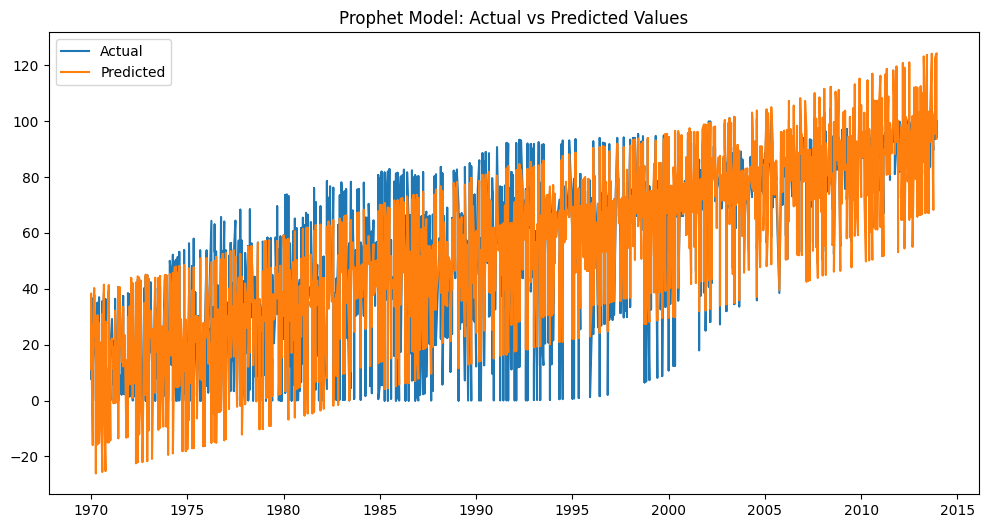

In [58]:
from prophet import Prophet

# Siapkan data untuk Prophet (dengan fitur tambahan sebagai regressor)
prophet_train = pd.DataFrame({
    'ds': pd.to_datetime(X_train_sorted['Year'].astype(str) + '-' + X_train_sorted['Month'].astype(str) + '-01'),
    'y': X_train_sorted['FoodPriceIndex'],
    'Country_AvgPrice': X_train_sorted['Country_AvgPrice'],
    'Month_sin': X_train_sorted['Month_sin'],
    'Month_cos': X_train_sorted['Month_cos'],
    'Elapsed_Months': X_train_sorted['Elapsed_Months'],
    'Quarter': X_train_sorted['Quarter'],
    'Semester': X_train_sorted['Semester']
})

prophet_val = pd.DataFrame({
    'ds': pd.to_datetime(X_val_sorted['Year'].astype(str) + '-' + X_val_sorted['Month'].astype(str) + '-01'),
    'y': X_val_sorted['FoodPriceIndex'],
    'Country_AvgPrice': X_val_sorted['Country_AvgPrice'],
    'Month_sin': X_val_sorted['Month_sin'],
    'Month_cos': X_val_sorted['Month_cos'],
    'Elapsed_Months': X_val_sorted['Elapsed_Months'],
    'Quarter': X_val_sorted['Quarter'],
    'Semester': X_val_sorted['Semester']
})

# Inisialisasi model Prophet dengan regressor tambahan
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# Tambahkan fitur eksternal sebagai regressor
model.add_regressor('Country_AvgPrice')
model.add_regressor('Month_sin')
model.add_regressor('Month_cos')
model.add_regressor('Elapsed_Months')
model.add_regressor('Quarter')
model.add_regressor('Semester')

# Fit model Prophet
model.fit(prophet_train)

# Prediksi dengan dataset validasi
forecast = model.predict(prophet_val)

smape_prophet = smape(prophet_val['y'].values, forecast['yhat'].values)
print(f'sMAPE: {smape_prophet:.2f}%')

# Plot nilai aktual vs prediksi
plt.figure(figsize=(12, 6))
plt.plot(prophet_val['ds'], prophet_val['y'], label='Actual')
plt.plot(prophet_val['ds'], forecast['yhat'], label='Predicted')
plt.title('Prophet Model: Actual vs Predicted Values')
plt.legend()
plt.show()


Epoch 1/50


C:\Users\Rudi Firdaus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1665 - val_loss: 0.0856
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0835 - val_loss: 0.0830
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0818 - val_loss: 0.0832
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0822 - val_loss: 0.0840
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0813 - val_loss: 0.0827
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0815 - val_loss: 0.0829
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0827 - val_loss: 0.0829
Epoch 8/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0814 - val_loss: 0.0835
Epoch 9/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0806 - val_loss: 0.0824
Epoch 10/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0815 - val_loss: 0.0823
Epoch 11/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0816 - val_loss: 0.0824
Epoch 12/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.

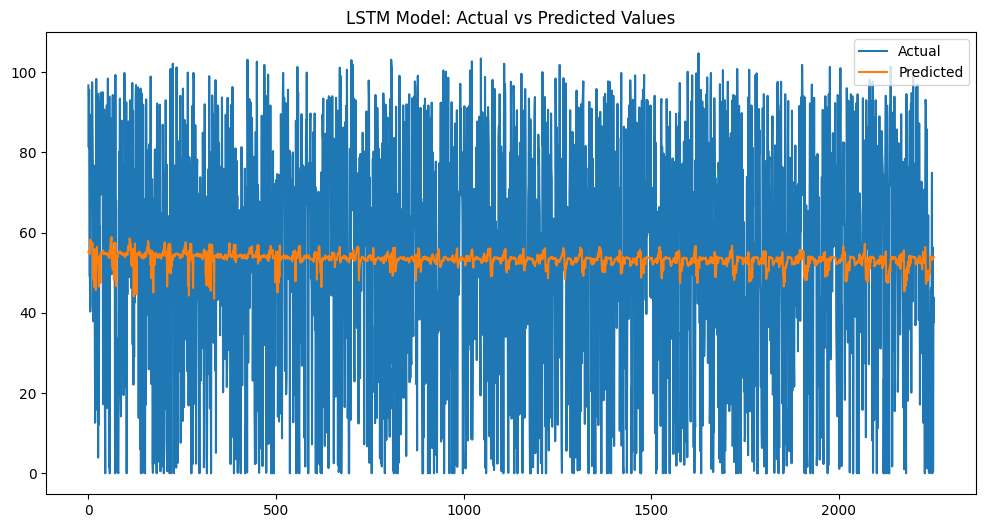

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']])
X_val_scaled = scaler.transform(X_val_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']])

# Scale the target variable
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1))

# Reshape input data for LSTM [samples, time steps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train_reshaped.shape[2])),  # Adjust input shape dynamically
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train_scaled, 
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val_reshaped, y_val_scaled))

# Make predictions
predictions_scaled = model.predict(X_val_reshaped)
predictions = y_scaler.inverse_transform(predictions_scaled)

# Calculate sMAPE
smape_lstm = smape(y_val.values, predictions.flatten())
print(f'sMAPE: {smape_lstm:.2f}%')

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_val.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Model: Actual vs Predicted Values')
plt.legend()
plt.show()

Denominator: [ 26.373     15.958     41.403    ... 187.017    200.057674 198.2502  ]
Numerator: [0.746    0.716    0.406    ... 2.766    0.284652 1.0996  ]
sMAPE: nan%


C:\Users\Rudi Firdaus\AppData\Local\Temp\ipykernel_4696\310606691.py:7: RuntimeWarning: invalid value encountered in divide
  return 100/len(A) * np.sum(numerator / denominator)


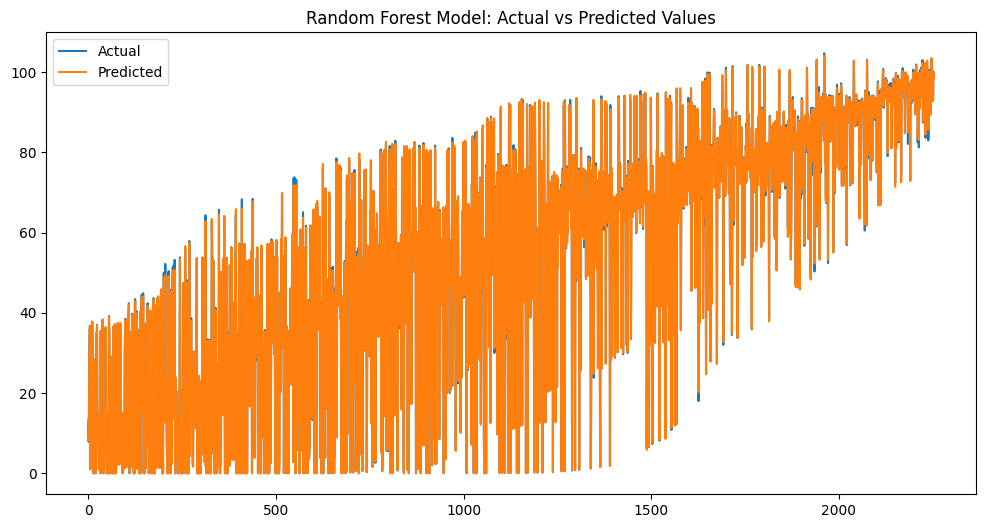


Feature Importance:
            feature  importance
7         YearMonth    0.333014
6    Elapsed_Months    0.313436
0           Country    0.168087
3  Country_AvgPrice    0.168016
1              Year    0.017127
4         Month_sin    0.000095
2             Month    0.000095
5         Month_cos    0.000081
8           Quarter    0.000035
9          Semester    0.000016


In [60]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']], X_train_sorted['FoodPriceIndex'])

# Make predictions
rf_predictions = rf_model.predict(X_val_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']])

# Calculate sMAPE
smape_rf = smape(X_val_sorted['FoodPriceIndex'].values, rf_predictions)
print(f'sMAPE: {smape_rf:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(rf_predictions, label='Predicted')
plt.title('Random Forest Model: Actual vs Predicted Values')
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester'],
    'importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

Denominator: [ 28.88289044  16.16074879  40.37400138 ... 187.37232048 198.9904949
 197.4029584 ]
Numerator: [5.76578088 1.12149757 1.65199725 ... 2.05535905 2.4190102  2.7940832 ]
sMAPE: nan%


C:\Users\Rudi Firdaus\AppData\Local\Temp\ipykernel_4696\310606691.py:7: RuntimeWarning: invalid value encountered in divide
  return 100/len(A) * np.sum(numerator / denominator)


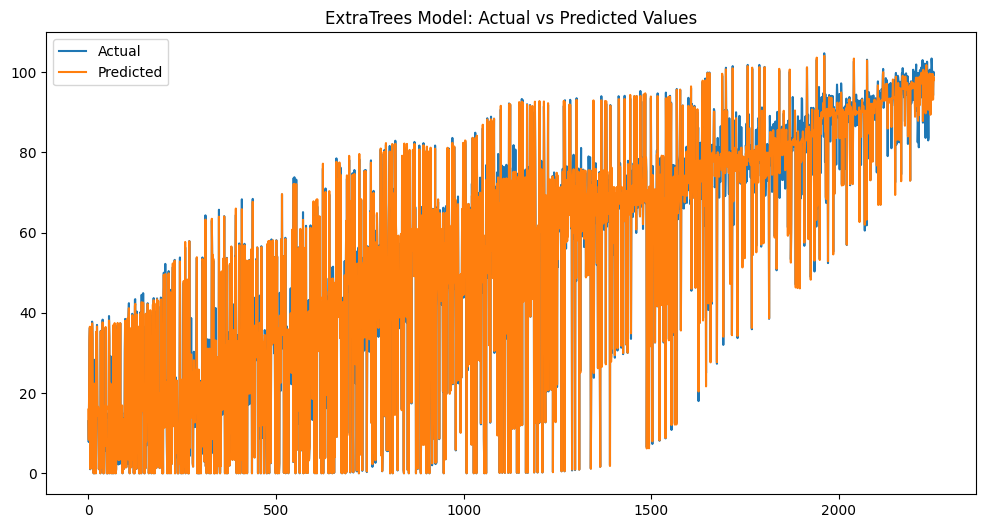


Feature Importance:
            feature  importance
6    Elapsed_Months    0.223840
1              Year    0.222338
7         YearMonth    0.208922
3  Country_AvgPrice    0.174813
0           Country    0.169923
9          Semester    0.000050
8           Quarter    0.000037
2             Month    0.000037
4         Month_sin    0.000021
5         Month_cos    0.000019


In [61]:
from sklearn.ensemble import ExtraTreesRegressor

# Initialize and train the model with tuned parameters
extra_model = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
extra_model.fit(X_train_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']], X_train_sorted['FoodPriceIndex'])

# Make predictions
extra_predictions = extra_model.predict(X_val_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']])

smape_extra = smape(X_val_sorted['FoodPriceIndex'].values, extra_predictions)
print(f'sMAPE: {smape_extra:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(extra_predictions, label='Predicted')
plt.title('ExtraTrees Model: Actual vs Predicted Values')
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester'],
    'importance': extra_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


Denominator: [ 26.46354103  16.1896122   41.37087212 ... 186.95093842 201.07013092
 198.82477417]
Numerator: [0.92708206 1.1792244  0.34174423 ... 2.89812317 1.74026184 0.04954834]
sMAPE: 12.10%


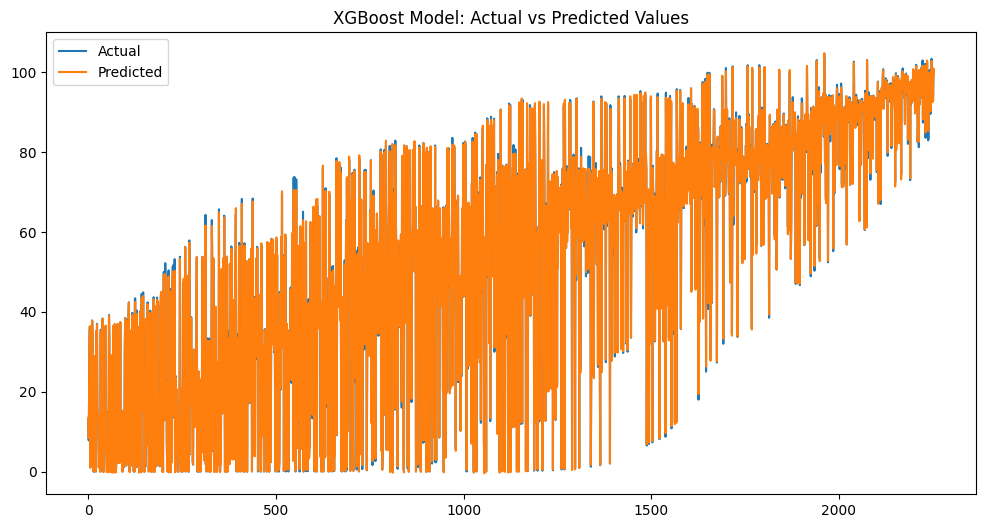


Feature Importance:
            feature  importance
6    Elapsed_Months    0.340008
1              Year    0.266968
0           Country    0.178395
7         YearMonth    0.130768
3  Country_AvgPrice    0.082498
2             Month    0.000429
4         Month_sin    0.000416
5         Month_cos    0.000371
8           Quarter    0.000146
9          Semester    0.000000


In [62]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(
    n_estimators=500,               # Jumlah pohon yang lebih banyak
    learning_rate=0.05,             # Kecepatan pembelajaran yang lebih kecil untuk kestabilan
    max_depth=6,                    # Kedalaman pohon standar
    subsample=0.8,                  # Menggunakan sebagian data untuk setiap pohon
    colsample_bytree=0.8,           # Menggunakan sebagian fitur untuk setiap pohon
    gamma=0.1,                      # Pengurangan minimum untuk pembelahan pohon
    min_child_weight=1,    # Menghentikan pelatihan lebih awal jika tidak ada peningkatan
    tree_method='hist',             # Menggunakan metode histogram untuk pohon yang lebih cepat
    random_state=42                 # Mengatur seed untuk hasil yang dapat direproduksi
)
# Fit the XGBoost model
xgb_model.fit(X_train_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']], X_train_sorted['FoodPriceIndex'])

# Make predictions
xgb_predictions = xgb_model.predict(X_val_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']])

# Calculate sMAPE for XGBoost
smape_xgb = smape(X_val_sorted['FoodPriceIndex'].values, xgb_predictions)
print(f'sMAPE: {smape_xgb:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(xgb_predictions, label='Predicted')
plt.title('XGBoost Model: Actual vs Predicted Values')  # Update title to reflect XGBoost
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester'],
    'importance': xgb_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

Denominator: [ 28.97888444  17.17786629  40.42536934 ... 196.25692616 201.10918827
 196.28224843]
Numerator: [ 5.95776887  3.15573257  1.54926133 ... 15.71385233  1.81837655
  5.03550315]
sMAPE: 21.39%


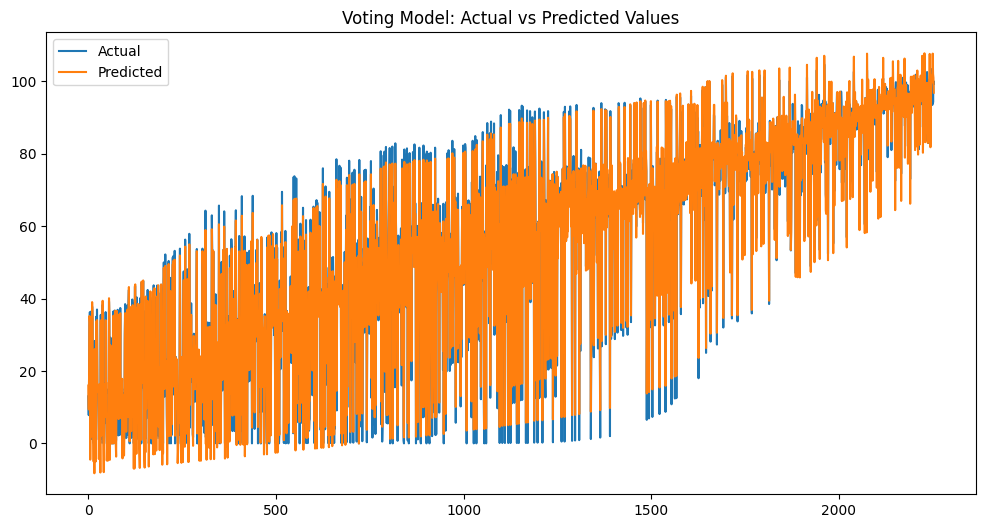

In [63]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

# Inisialisasi model dasar
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = XGBRegressor(n_estimators=100, random_state=42)

# Inisialisasi model Voting
voting_model = VotingRegressor(estimators=[('lr', model1), ('rf', model2), ('xgb', model3)])

# Fit the XGBoost model
voting_model.fit(X_train_sorted[['Country', 'Year', 'Month']], X_train_sorted['FoodPriceIndex'])

# Make predictions
voting_predictions = voting_model.predict(X_val_sorted[['Country', 'Year', 'Month']])

# Calculate sMAPE for XGBoost
smape_voting = smape(X_val_sorted['FoodPriceIndex'].values, voting_predictions)
print(f'sMAPE: {smape_voting:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(voting_predictions, label='Predicted')
plt.title('Voting Model: Actual vs Predicted Values')  # Update title to reflect XGBoost
plt.legend()
plt.show()

In [64]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
mlp_model.fit(X_train_sorted[['Country', 'Year', 'Month']], X_train_sorted['FoodPriceIndex'])
predictions_mlp = mlp_model.predict(X_val_sorted[['Country', 'Year', 'Month']])

smape_mlp = smape(X_val_sorted['FoodPriceIndex'], predictions_mlp)
print(f'sMAPE MLP: {smape_mlp:.2f}%')

Denominator: 7492      76.350509
5907      62.273306
10839     81.164358
7095     113.923788
1892     106.333628
            ...    
8338     175.654540
6622     183.213660
10598    176.406148
7898     163.588673
2206     152.566924
Name: FoodPriceIndex, Length: 2254, dtype: float64
Numerator: 7492     100.701019
5907      93.346612
10839     79.928716
7095      97.447576
1892      67.584455
            ...    
8338      22.690921
6622      32.772679
10598     23.987704
7898      73.222655
2206      92.466151
Name: FoodPriceIndex, Length: 2254, dtype: float64
sMAPE MLP: 55.42%


In [65]:
rf_predictions

array([13.373   ,  8.158   , 20.803   , ..., 92.817   , 99.957674,
       98.8502  ])

In [66]:
# Check for zero or NaN values in actual values
zero_mask = X_val_sorted['FoodPriceIndex'] == 0
print(f"Zero values in actuals: {X_val_sorted['FoodPriceIndex'][zero_mask].shape[0]}")

# Check for NaN values in actual and predicted values
print(f"NaN values in actuals: {X_val_sorted['FoodPriceIndex'].isna().sum()}")
print(f"NaN values in predictions: {np.isnan(rf_predictions).sum()}")

# Check if actual and predicted values have the same length
print(f"Length of actuals: {len(X_val_sorted['FoodPriceIndex'])}")
print(f"Length of predictions: {len(rf_predictions)}")

# Inspect predictions to ensure they're not constant or unrealistic
print(f"Sample of predictions: {rf_predictions[:10]}")

Zero values in actuals: 103
NaN values in actuals: 0
NaN values in predictions: 0
Length of actuals: 2254
Length of predictions: 2254
Sample of predictions: [13.373     8.158    20.803    32.994    36.809222  1.       16.404
  1.352    36.817333  8.124   ]


In [67]:
# Filter out zero actual values
non_zero_mask = X_val_sorted['FoodPriceIndex'] != 0

# Apply the mask to both actual and predicted values
smape_rf = smape(X_val_sorted['FoodPriceIndex'][non_zero_mask].values, 
                 rf_predictions[non_zero_mask])

print(f'sMAPE: {smape_rf:.2f}%')

Denominator: [ 26.373     15.958     41.403    ... 187.017    200.057674 198.2502  ]
Numerator: [0.746    0.716    0.406    ... 2.766    0.284652 1.0996  ]
sMAPE: 0.95%


In [68]:
test.drop('id', axis=1, inplace=True)
test.head()

,Country,Year,Month
0,Italy,2023,4
1,Denmark,2022,7
2,United States,2019,6
3,Netherlands,2021,2
4,Italy,2019,8


In [69]:
# Gunakan rata-rata negara berdasarkan data train
test['Country_AvgPrice'] = test['Country'].map(country_avg)

# Karena test tidak memiliki kolom FoodPriceIndex, tidak bisa membuat lagging dan moving average

# Cyclical encoding untuk bulan
test['Month_sin'] = np.sin(2 * np.pi * test['Month'] / 12)
test['Month_cos'] = np.cos(2 * np.pi * test['Month'] / 12)

# Waktu berlalu dari awal dataset
test['Elapsed_Months'] = (test['Year'] - train['Year'].min()) * 12 + test['Month']

# Kombinasi Year dan Month menjadi YYYYMM
test['YearMonth'] = test['Year'] * 100 + test['Month']

# Menambahkan kolom kuartal
test['Quarter'] = ((test['Month'] - 1) // 3) + 1

# Menambahkan kolom semester
test['Semester'] = ((test['Month'] - 1) // 6) + 1

In [70]:
# apply target encoding to test data
test = te.transform(test)
test.head()

,Country,Year,Month,Country_AvgPrice,Month_sin,Month_cos,Elapsed_Months,YearMonth,Quarter,Semester
0,52.708049,2023,4,53.095517,8.660254e-01,-0.500000,640,202304,2,1
1,59.943839,2022,7,59.473870,-5.000000e-01,-0.866025,631,202207,3,2
2,55.878469,2019,6,55.588998,1.224647e-16,-1.000000,594,201906,2,1
3,71.744059,2021,2,71.803340,8.660254e-01,0.500000,614,202102,1,1
4,52.708049,2019,8,53.095517,-8.660254e-01,-0.500000,596,201908,3,2


In [71]:
# apply predictions
test['FoodPriceIndex'] = rf_model.predict(test)
test

,Country,Year,Month,Country_AvgPrice,Month_sin,Month_cos,Elapsed_Months,YearMonth,Quarter,Semester,FoodPriceIndex
0,52.708049,2023,4,53.095517,8.660254e-01,-5.000000e-01,640,202304,2,1,99.260000
1,59.943839,2022,7,59.473870,-5.000000e-01,-8.660254e-01,631,202207,3,2,99.796000
2,55.878469,2019,6,55.588998,1.224647e-16,-1.000000e+00,594,201906,2,1,96.249000
3,71.744059,2021,2,71.803340,8.660254e-01,5.000000e-01,614,202102,1,1,99.042354
4,52.708049,2019,8,53.095517,-8.660254e-01,-5.000000e-01,596,201908,3,2,99.596000
...,...,...,...,...,...,...,...,...,...,...,...
2635,61.501546,2022,2,62.355750,8.660254e-01,5.000000e-01,626,202202,1,1,100.108416
2636,59.943839,2020,4,59.473870,8.660254e-01,-5.000000e-01,604,202004,2,1,99.778000
2637,43.888835,2017,1,43.862136,5.000000e-01,8.660254e-01,565,201701,1,1,99.718000
2638,43.888835,2020,3,43.862136,1.000000e+00,6.123234e-17,603,202003,1,1,99.870000


In [72]:
submission = pd.read_csv(r'D:\Visual Studio\Lomba\Lomba Adikara\sample_submission_adikara2024.csv')
submission.head()

,id,FoodPriceIndex
0,99116,20.5
1,97687,20.5
2,92061,20.5
3,95122,20.5
4,92296,20.5


In [73]:
submission['FoodPriceIndex'] = test['FoodPriceIndex']
submission

,id,FoodPriceIndex
0,99116,99.260000
1,97687,99.796000
2,92061,96.249000
3,95122,99.042354
4,92296,99.596000
...,...,...
2635,96922,100.108416
2636,93502,99.778000
2637,87476,99.718000
2638,93366,99.870000


In [74]:
# submission.to_csv("D:/Visual Studio/Lomba/Lomba Adikara/mbc14.csv", index=False)